<a href="https://colab.research.google.com/github/varun6579/AIML-1278/blob/main/ADMfakereview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🚀 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# 📥 Load dataset
df = pd.read_csv("/content/fake_review_dataset_with_rating.csv")

# 👀 Initial inspection
print(df.head())






               name                                             review label  \
0      Renee Bishop          You won't regret buying this!! Awesome!!!  fake   
1       David Adams          You won't regret buying this!! Awesome!!!  fake   
2  Carla Williamson               Excellent quality and fast delivery.  real   
3       Linda Poole             This product exceeded my expectations.  real   
4   Katherine Klein  I can't believe how good this is! Totally wort...  fake   

   product_rating  
0               5  
1               2  
2               4  
3               3  
4               3  


In [ ]:
# 🧼 Preprocessing
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # fake = 0, real = 1

X = df['review']
y = df['label']

# 🔠 Convert text to TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = tfidf.fit_transform(X)

# 🧪 Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
# 🧠 Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
    "SVM": SVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"📊 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results.append((name, acc))

📊 Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

📊 Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

📊 Neural Network Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.0

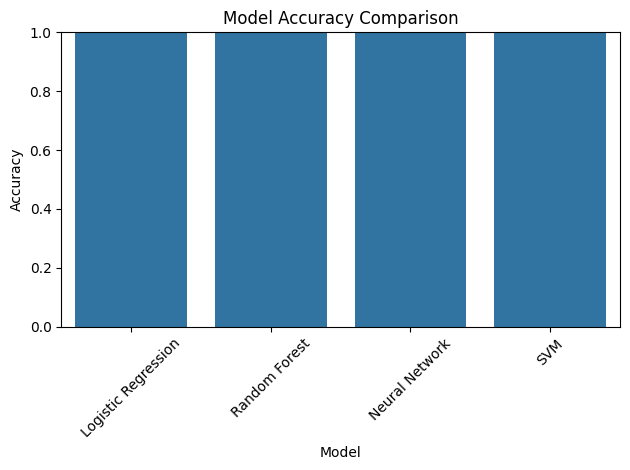

In [ ]:
# 📈 Visualization
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Feature engineering
data['review_length'] = data['review'].apply(lambda x: len(x.split()))
data['exclam_count'] = data['review'].apply(lambda x: x.count('!'))
data['caps_ratio'] = data['review'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

# Add to model input
X_additional = data[['review_length', 'exclam_count', 'caps_ratio', 'product_rating']]
X_text = tfidf.fit_transform(data['review'])
from scipy.sparse import hstack
X_combined = hstack([X_text, X_additional])


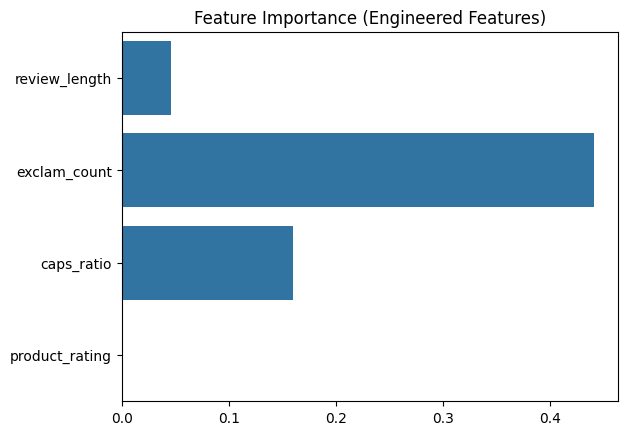

In [ ]:
# Feature importance for Random Forest
rf = RandomForestClassifier()
rf.fit(X_combined, y)
importances = rf.feature_importances_

# Plot feature importance for custom features
importances_named = importances[-4:]  # last features are engineered ones
feat_names = ['review_length', 'exclam_count', 'caps_ratio', 'product_rating']
sns.barplot(x=importances_named, y=feat_names)
plt.title("Feature Importance (Engineered Features)")
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

# Sample review dataset (replace with your actual dataset)
reviews = [
    "This product is amazing, I love it!",
    "Terrible, it didn't work at all.",
    "It worked as expected, but nothing special.",
    "The worst purchase I’ve made, do not recommend.",
    "Great quality, definitely recommend!",
    "Fake review, do not trust this."
]

# Labels: 1 = Fake, 0 = Real (for this example)
labels = [0, 0, 0, 1, 0, 1]  # 0 = Real, 1 = Fake

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.3, random_state=42)

# Create a pipeline with vectorizer and model (we'll use Logistic Regression for this example)
vectorizer = CountVectorizer()
model = LogisticRegression()

# Train the model using the pipeline
pipeline = make_pipeline(vectorizer, model)
pipeline.fit(X_train, y_train)

# Test the model on the test set
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"📊 Logistic Regression Accuracy: {acc:.4f}")

# Sample review to test
sample_review = ["expected a better product"]

# Transform the sample review using the vectorizer and make a prediction
sample_vec = vectorizer.transform(sample_review)
result = model.predict(sample_vec)

# Output the result
print("Review is:", "Fake" if result[0] == 1 else "Real")


📊 Logistic Regression Accuracy: 1.0000
Review is: Real
